In [52]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

In [53]:
data = pd.read_csv("../Dataset/Jin2017/data.csv")

In [54]:
data

,miRNA,CON-1,CON-2,CON-3,CON-4,CON-5,CON-6,CON-7,CON-8,CON-9,...,SCC-1,SCC-2,SCC-3,SCC-4,SCC-5,SCC-6,SCC-7,SCC-8,SCC-9,SCC-10
0,hsa-let-7a-2-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hsa-let-7a-3p,6.515507,20.902514,146.033115,37.015298,38.090595,61.473678,43.168806,327.037377,78.165009,...,493.047263,57.930362,NaN,181.093807,50.519084,NaN,216.702332,419.435135,NaN,NaN
2,hsa-let-7a-5p,43745.113370,36244.959390,27806.095840,131369.054900,59179.724490,68309.209180,90409.706310,22878.016520,25276.946710,...,140433.727500,56908.957860,11081.226470,42919.232160,33363.644780,31264.367820,153154.373300,95433.252970,28009.800650,77704.276050
3,hsa-let-7b-3p,NaN,29.376506,18.080290,49.353731,47.885319,20.491226,45.621579,119.719040,NaN,...,15.407727,7.622416,NaN,NaN,4.209924,NaN,NaN,90.158954,NaN,2.572989
4,hsa-let-7b-5p,NaN,NaN,NaN,NaN,6.529816,0.853801,14.226084,NaN,NaN,...,1779.592466,6640.648820,2187.556034,20825.787760,2117.591587,37547.892720,5444.646098,1177.946336,7406.169952,25.729893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,hsa-miR-98-5p,794.891843,2339.386777,720.430033,6058.170422,2076.481561,2440.163486,4308.541194,129.938958,21.562761,...,1394.399291,97.566925,NaN,362.187613,269.435112,459.770115,2464.989029,1993.296878,111.370977,18.010925
952,hsa-miR-99a-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,hsa-miR-99a-5p,45.608548,142.363069,267.031981,31.727398,204.600909,197.228049,257.050619,998.631991,1126.654268,...,92.446362,105.189341,NaN,NaN,54.729007,613.026820,27.087792,35.279591,NaN,NaN
954,hsa-miR-99b-3p,13.031014,10.168791,130.734408,NaN,1.088303,25.614032,37.282151,8.759930,21.562761,...,NaN,NaN,NaN,181.093807,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
table = data.iloc[:, 1:].transpose()
mirnas = data.iloc[:, 0]

In [56]:
controls = np.array(["CON" in k for k in data.columns[1:]])
sick = 1 - controls

In [57]:
controls

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [58]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,946,947,948,949,950,951,952,953,954,955
CON-1,NaN,6.515507,43745.11337,NaN,NaN,NaN,4626.009904,78.186083,4684.649466,NaN,...,NaN,286.682304,299.713318,32.577535,13.031014,794.891843,NaN,45.608548,13.031014,3570.497785
CON-2,NaN,20.902514,36244.95939,29.376506,NaN,NaN,3909.899996,329.920763,11702.583210,4.519463,...,NaN,16.947984,3.954530,NaN,2.259731,2339.386777,NaN,142.363069,10.168791,11889.575970
CON-3,NaN,146.033115,27806.09584,18.080290,NaN,NaN,2008.303026,94.573827,3182.131110,26.425040,...,NaN,891.497396,1546.560225,8.344749,5.563166,720.430033,NaN,267.031981,130.734408,14282.038620
CON-4,NaN,37.015298,131369.05490,49.353731,NaN,NaN,4877.206156,505.875738,51985.341940,8.813166,...,NaN,NaN,NaN,NaN,3.525266,6058.170422,NaN,31.727398,NaN,3371.917375
CON-5,NaN,38.090595,59179.72449,47.885319,6.529816,2.176605,107596.135200,452.733925,34343.568460,3.264908,...,NaN,1.088303,1.088303,NaN,8.706422,2076.481561,NaN,204.600909,1.088303,5945.397677


In [59]:
mask = table.isna().sum() < 10
table = table.loc[:, mask]
mirnas = mirnas[mask]

In [60]:
table = table.fillna(table.mean())

In [61]:
table.head()

,1,2,4,6,7,8,10,11,13,15,...,924,929,931,932,941,945,948,951,953,955
CON-1,6.515507,43745.11337,80148.780551,4626.009904,78.186083,4684.649466,7010.685431,51.233940,2984.102163,97.732604,...,10170.706280,39.093041,40761.011210,1342.194423,273.651290,1733.124837,299.713318,794.891843,45.608548,3570.497785
CON-2,20.902514,36244.95939,80148.780551,3909.899996,329.920763,11702.583210,5962.300904,27.116775,2820.144600,181.343433,...,346.868747,3.389597,4514.943038,2103.809794,2.824664,513.523927,3.954530,2339.386777,142.363069,11889.575970
CON-3,146.033115,27806.09584,80148.780551,2008.303026,94.573827,3182.131110,4657.760965,11.126333,4928.965321,460.352009,...,5145.928805,2.781583,49944.716040,1547.951016,756.590614,1168.264918,1546.560225,720.430033,267.031981,14282.038620
CON-4,37.015298,131369.05490,80148.780551,4877.206156,505.875738,51985.341940,18026.450070,28.202132,13274.390880,671.563262,...,1247.944329,144.527713,8633.377575,3482.963268,61886.362225,537.603136,919.785941,6058.170422,31.727398,3371.917375
CON-5,38.090595,59179.72449,6.529816,107596.135200,452.733925,34343.568460,9998.236950,47.885319,7929.373508,216.572238,...,236.161687,144.527713,2247.345086,105.565362,9.794724,252.466743,1.088303,2076.481561,204.600909,5945.397677


### T-test

In [62]:
X = table

In [63]:
X

,1,2,4,6,7,8,10,11,13,15,...,924,929,931,932,941,945,948,951,953,955
CON-1,6.515507,43745.113370,80148.780551,4626.009904,78.186083,4684.649466,7010.685431,51.233940,2984.102163,97.732604,...,10170.706280,39.093041,40761.011210,1342.194423,273.651290,1733.124837,299.713318,794.891843,45.608548,3570.497785
CON-2,20.902514,36244.959390,80148.780551,3909.899996,329.920763,11702.583210,5962.300904,27.116775,2820.144600,181.343433,...,346.868747,3.389597,4514.943038,2103.809794,2.824664,513.523927,3.954530,2339.386777,142.363069,11889.575970
CON-3,146.033115,27806.095840,80148.780551,2008.303026,94.573827,3182.131110,4657.760965,11.126333,4928.965321,460.352009,...,5145.928805,2.781583,49944.716040,1547.951016,756.590614,1168.264918,1546.560225,720.430033,267.031981,14282.038620
CON-4,37.015298,131369.054900,80148.780551,4877.206156,505.875738,51985.341940,18026.450070,28.202132,13274.390880,671.563262,...,1247.944329,144.527713,8633.377575,3482.963268,61886.362225,537.603136,919.785941,6058.170422,31.727398,3371.917375
CON-5,38.090595,59179.724490,6.529816,107596.135200,452.733925,34343.568460,9998.236950,47.885319,7929.373508,216.572238,...,236.161687,144.527713,2247.345086,105.565362,9.794724,252.466743,1.088303,2076.481561,204.600909,5945.397677
CON-6,61.473678,68309.209180,0.853801,95951.019140,220.280679,35058.779940,11871.250210,24.760231,8590.946464,269.801141,...,244.187109,144.527713,2028.631365,46.105258,17.076022,0.853801,12.807016,2440.163486,197.228049,3934.315375
CON-7,43.168806,90409.706310,14.226084,107926.921100,458.668566,38310.843860,15407.339380,37.772705,17091.903940,570.024464,...,268.333375,144.527713,2943.327697,78.488739,22.565512,252.466743,1.962218,4308.541194,257.050619,2284.022293
CON-8,327.037377,22878.016520,80148.780551,2011.863865,1534.447694,7002.103843,3309.793455,51.233940,1795.785598,119.719040,...,731.597499,176.658583,1838.125258,657.208028,61886.362225,252.466743,37.959696,129.938958,998.631991,534.355714
CON-9,78.165009,25276.946710,80148.780551,1609.121048,1013.449772,5703.350314,4266.731355,8.086035,202.150885,26.953451,...,2.695345,51.211558,1978.383332,18.867416,61886.362225,252.466743,919.785941,21.562761,1126.654268,404.301771
CON-10,11.817281,55403.353350,80148.780551,4762.364323,55.147312,7578.816342,6343.910457,7.878187,411.635295,3.939094,...,70.903687,179.228765,218.619702,657.208028,61886.362225,252.466743,1.969547,86.660062,401.787561,35.451844


In [64]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [65]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [66]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [67]:
mirnas.iloc[lowest], pvalues

(318    hsa-miR-30a-3p
 894    hsa-miR-744-5p
 256     hsa-miR-21-5p
 312    hsa-miR-29b-3p
 283    hsa-miR-23a-3p
 Name: miRNA, dtype: object,
 array([2.27964967e-09, 3.44544025e-06, 9.29269409e-06, 3.71438915e-05,
        3.77260036e-05]))

### F-test

In [68]:
t3 = table

In [69]:
f, p = f_classif(t3, sick)

In [70]:
np.mean(p)

0.2176454371237826

### ANOVA

In [71]:
t3

,1,2,4,6,7,8,10,11,13,15,...,924,929,931,932,941,945,948,951,953,955
CON-1,6.515507,43745.113370,80148.780551,4626.009904,78.186083,4684.649466,7010.685431,51.233940,2984.102163,97.732604,...,10170.706280,39.093041,40761.011210,1342.194423,273.651290,1733.124837,299.713318,794.891843,45.608548,3570.497785
CON-2,20.902514,36244.959390,80148.780551,3909.899996,329.920763,11702.583210,5962.300904,27.116775,2820.144600,181.343433,...,346.868747,3.389597,4514.943038,2103.809794,2.824664,513.523927,3.954530,2339.386777,142.363069,11889.575970
CON-3,146.033115,27806.095840,80148.780551,2008.303026,94.573827,3182.131110,4657.760965,11.126333,4928.965321,460.352009,...,5145.928805,2.781583,49944.716040,1547.951016,756.590614,1168.264918,1546.560225,720.430033,267.031981,14282.038620
CON-4,37.015298,131369.054900,80148.780551,4877.206156,505.875738,51985.341940,18026.450070,28.202132,13274.390880,671.563262,...,1247.944329,144.527713,8633.377575,3482.963268,61886.362225,537.603136,919.785941,6058.170422,31.727398,3371.917375
CON-5,38.090595,59179.724490,6.529816,107596.135200,452.733925,34343.568460,9998.236950,47.885319,7929.373508,216.572238,...,236.161687,144.527713,2247.345086,105.565362,9.794724,252.466743,1.088303,2076.481561,204.600909,5945.397677
CON-6,61.473678,68309.209180,0.853801,95951.019140,220.280679,35058.779940,11871.250210,24.760231,8590.946464,269.801141,...,244.187109,144.527713,2028.631365,46.105258,17.076022,0.853801,12.807016,2440.163486,197.228049,3934.315375
CON-7,43.168806,90409.706310,14.226084,107926.921100,458.668566,38310.843860,15407.339380,37.772705,17091.903940,570.024464,...,268.333375,144.527713,2943.327697,78.488739,22.565512,252.466743,1.962218,4308.541194,257.050619,2284.022293
CON-8,327.037377,22878.016520,80148.780551,2011.863865,1534.447694,7002.103843,3309.793455,51.233940,1795.785598,119.719040,...,731.597499,176.658583,1838.125258,657.208028,61886.362225,252.466743,37.959696,129.938958,998.631991,534.355714
CON-9,78.165009,25276.946710,80148.780551,1609.121048,1013.449772,5703.350314,4266.731355,8.086035,202.150885,26.953451,...,2.695345,51.211558,1978.383332,18.867416,61886.362225,252.466743,919.785941,21.562761,1126.654268,404.301771
CON-10,11.817281,55403.353350,80148.780551,4762.364323,55.147312,7578.816342,6343.910457,7.878187,411.635295,3.939094,...,70.903687,179.228765,218.619702,657.208028,61886.362225,252.466743,1.969547,86.660062,401.787561,35.451844


In [72]:
X = np.array(sick).reshape(-1, 1)

In [73]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [74]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.10864566756435487

### Mean-variance-plot

In [75]:
np.mean(table)

1        223.548928
2      46164.583735
4      80148.780551
6      11001.905801
7       1134.553527
           ...     
945      252.466743
948      919.785941
951      845.058091
953      415.521660
955     1594.988001
Length: 186, dtype: float64

In [76]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [77]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

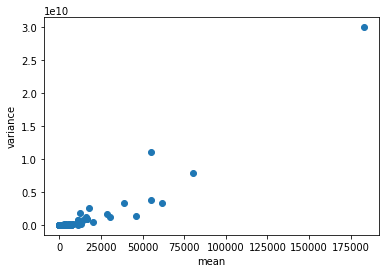

In [78]:
mean_variance_plot(table)

### Log transformation

In [79]:
log_table = np.log2(table)

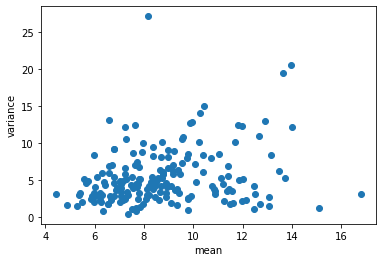

In [80]:
mean_variance_plot(log_table)

In [81]:
norm_log_table = log_table - np.mean(log_table)

In [82]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

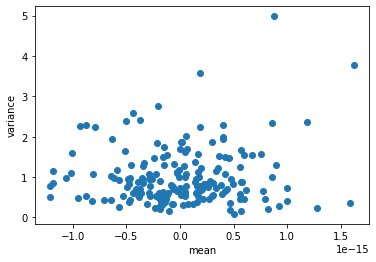

In [83]:
mean_variance_plot(norm_log_table)

### PCA

In [84]:
pca = decomposition.PCA(n_components=10)

In [85]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [86]:
pca.explained_variance_ratio_

array([0.2659577 , 0.14464987, 0.11543428, 0.09113248, 0.05944718,
       0.04091961, 0.03139788, 0.02452751, 0.02283063, 0.02089612])

In [87]:
components = pca.transform(norm_log_table)

In [88]:
components.shape

(38, 10)

In [89]:
sum(controls)

12

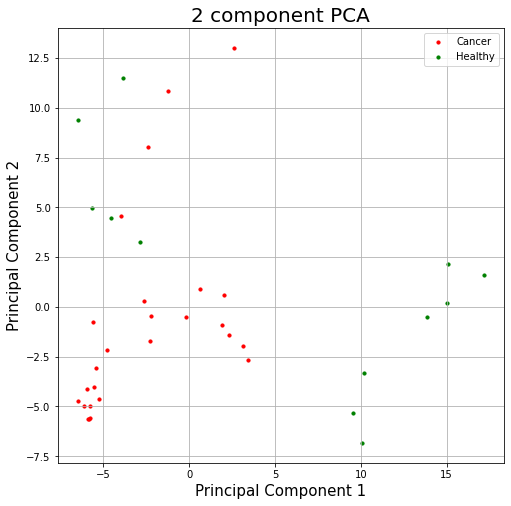

In [90]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [91]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

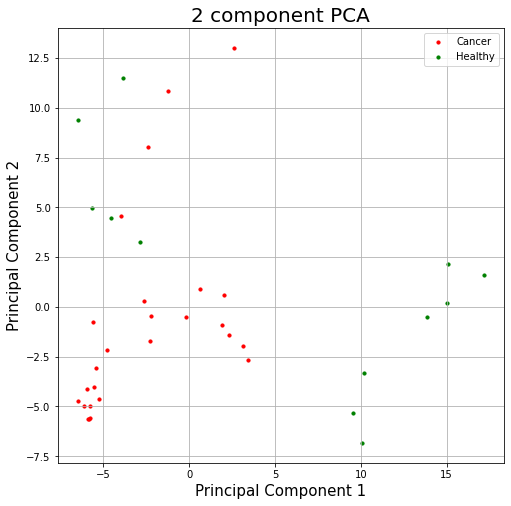

In [92]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [93]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [94]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

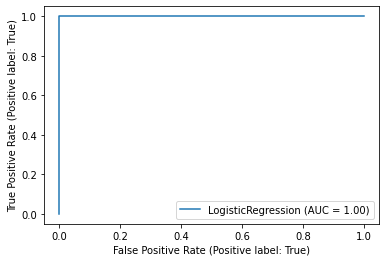

In [95]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [96]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[15:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

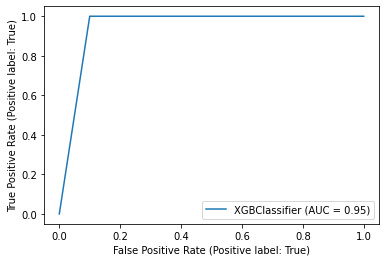

In [97]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [98]:
mirnas[:10]

1       hsa-let-7a-3p
2       hsa-let-7a-5p
4       hsa-let-7b-5p
6       hsa-let-7c-5p
7       hsa-let-7d-3p
8       hsa-let-7d-5p
10      hsa-let-7e-5p
11    hsa-let-7f-1-3p
13      hsa-let-7f-5p
15      hsa-let-7g-5p
Name: miRNA, dtype: object

In [99]:
from Scripts import converters

In [100]:
sequences = converters.canonical_to_seq(mirnas)

In [101]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = sick
norm_log_table.head()

,CUAUACAAUCUACUGUCUUUC,UGAGGUAGUAGGUUGUAUAGUU,UGAGGUAGUAGGUUGUGUGGUU,UGAGGUAGUAGGUUGUAUGGUU,CUAUACGACCUGCUGCCUUUCU,AGAGGUAGUAGGUUGCAUAGUU,UGAGGUAGGAGGUUGUAUAGUU,CUAUACAAUCUAUUGCCUUCCC,UGAGGUAGUAGAUUGUAUAGUU,UGAGGUAGUAGUUUGUACAGUU,...,UUAAUAUCGGACAACCAUUGU,UAUUGCACUUGUCCCGGCCUGU,UAUUGCACUCGUCCCGGCCUCC,AUAAAGCUAGAUAACCGAAAGU,UCUUCUCUGUUUUGGCCAUGUG,UCUUUGGUUAUCUAGCUGUAUGA,UGAGGUAGUAAGUUGUAUUGUU,AACCCGUAGAUCCGAUCUUGUG,CACCCGUAGAACCGACCUUGCG,cancer
CON-1,-1.924868,0.139135,0.995256,0.250700,-1.305623,-0.219754,0.547455,0.166573,0.280071,-0.529390,...,-0.575261,1.353637,0.893479,-2.375713,1.797331,0.248685,0.515731,-1.106257,1.295879,0
CON-2,-1.204430,0.022895,0.995256,0.146756,-0.415795,0.346071,0.447346,-0.226654,0.245145,-0.147345,...,-2.086510,-0.006254,1.171253,-5.202291,1.045558,-2.426165,1.182866,-0.402752,2.039353,0
CON-3,-0.002985,-0.140914,0.995256,-0.264994,-1.188017,-0.458775,0.294739,-0.777227,0.590222,0.428419,...,-2.208690,1.479217,0.981628,-1.747187,1.553573,1.262863,0.454942,-0.014013,2.152665,0
CON-4,-0.851244,0.818749,0.995256,0.283381,-0.151621,1.267661,1.131134,-0.202399,1.202518,0.661801,...,0.232841,0.394385,1.482827,0.974800,1.073879,0.941701,1.770941,-1.330552,1.260513,0
CON-5,-0.833546,0.325906,-4.823740,2.195476,-0.220215,1.011455,0.766842,0.124798,0.884065,-0.037623,...,0.232841,-0.437425,-0.678027,-4.433788,0.606740,-3.223585,1.109187,-0.178601,1.611025,0


In [102]:
norm_log_table.to_csv("../TransformedData/Jin2017.csv", index=False)